<h1 align="center">Text and Speech - Cognitive services Lab</h1>
<h1 align="center">Meetup DFW Data & AI - Microsoft</h1>

# Text and Speech Analysis
This notebook includes some basic examples of techniques used to analyze text and speech.

## Performing Basic Frequency Analysis
Let's start by using some very basic frequency analysis on a document to see if we can determine what the document is about  based on word frequency.

### Load a Text Document
Run the cell below to load a document and view the text it contains.

In [1]:
# Use Curl to get a document from GitHub and open it
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Moon.txt -o Moon.txt
doc1 = open("Moon.txt", "r")
# Read the document and print its contents
doc1Txt = doc1.read()
print(doc1Txt)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1589  100  1589    0     0   4700      0 --:--:-- --:--:-- --:--:--  4701
We set sail on this new sea because there is new knowledge to be gained, and new rights to be won, and they must be won and used for the progress of all people. For space science, like nuclear science and all technology, has no conscience of its own. Whether it will become a force for good or ill depends on man, and only if the United States occupies a position of pre-eminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war. I do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea, but I do say that space can be explored and mastered without feeding the fires of war, without repeating the mistakes that 

### Normalize the Text
Text includes a lot of punctuation, which we need to remove if we want to work only with the actual words.

Run the cell below to strip all the punctuation from the text and convert the words to lower case.

In [2]:
from string import punctuation

# remove numeric digits
txt = ''.join(c for c in doc1Txt if not c.isdigit())

# remove punctuation and make lower case
txt = ''.join(c for c in txt if c not in punctuation).lower()

# print the normalized text
print (txt)

we set sail on this new sea because there is new knowledge to be gained and new rights to be won and they must be won and used for the progress of all people for space science like nuclear science and all technology has no conscience of its own whether it will become a force for good or ill depends on man and only if the united states occupies a position of preeminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war i do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea but i do say that space can be explored and mastered without feeding the fires of war without repeating the mistakes that man has made in extending his writ around this globe of ours
there is no strife no prejudice no national conflict in outer space as yet its hazards are hostile to us all its conquest deserves the best of all mankind and its opportunity for peaceful

### Get the Frequency Distribution
Now let's tokenize the text (split it into individual words), and count the number of times each word occurs.

In [3]:
import nltk
import pandas as pd
from nltk.probability import FreqDist
nltk.download("punkt")

# Tokenize the text into individual words
words = nltk.tokenize.word_tokenize(txt)

# Get the frequency distribution of the words into a data frame
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']
print (count_frame)

[nltk_data] Downloading package punkt to /home/sshuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
             Count
a                4
accept           1
again            1
against          2
ago              1
all              4
and             12
any              1
are              5
around           1
as               2
ask              1
atlantic         1
be               5
because          5
become           1
best             2
but              3
can              2
challenge        1
choose           3
climb            1
come             1
conflict         1
conquest         1
conscience       1
cooperation      1
decade           1
decide           1
depends          1
...            ...
terrifying       1
texas            1
than             1
that             6
the             14
theater          1
there            2
they             4
things           1
this             5
to              11
united           1
unprotected      2
unwilling        1
us     

### Visualize Word Frequency
It's often easier to analyze frequency by creating a visualization, such as a Pareto chart.

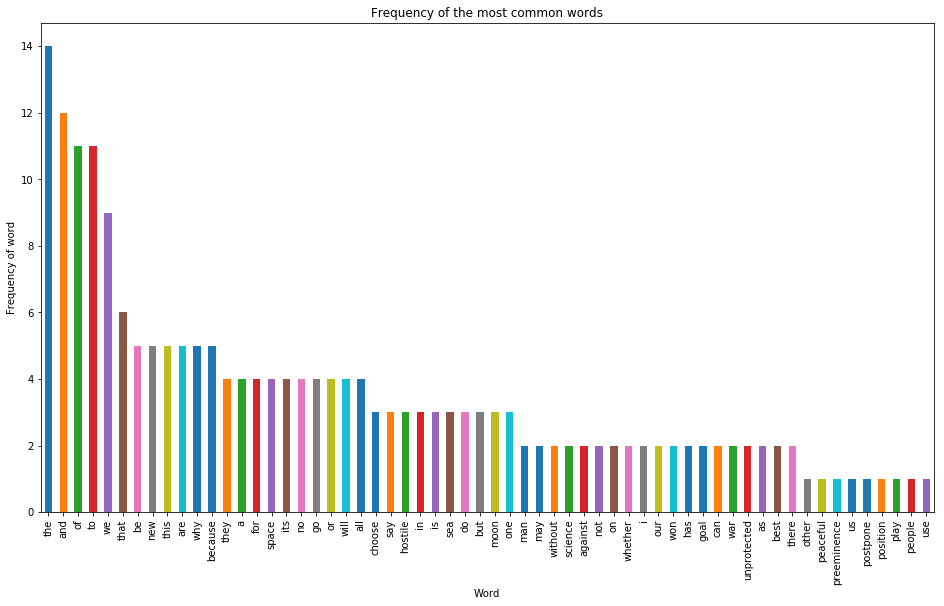

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Remove Stopwords
A large number of the words in the text are common words like "the" or "and". These "stopwords" add little in the way of semantic meaning to the text, and won't help us determine the subject matter - so run the cell below to remove them.

In [5]:
# remove stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
txt = ' '.join([word for word in txt.split() if word not in (stopwords.words('english'))])
print("\n")
print(txt)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sshuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


set sail new sea new knowledge gained new rights must used progress people space science like nuclear science technology conscience whether become force good ill depends man united states occupies position preeminence help decide whether new ocean sea peace new terrifying theater war say go unprotected hostile misuse space go unprotected hostile use land sea say space explored mastered without feeding fires war without repeating mistakes man made extending writ around globe strife prejudice national conflict outer space yet hazards hostile us conquest deserves best mankind opportunity peaceful cooperation may never come say moon choose goal may well ask climb highest mountain years ago fly atlantic rice play texas choose go moon choose go moon decade things easy hard goal serve organize measure best energies skills challenge one willing accept

### Visualize the Frequency Distribution for the Remaining Words
Now that we've prepared the text, we can tokenize the string into a list of individual words, and then perform frequency analysis on those words based on how often they appear in the text.

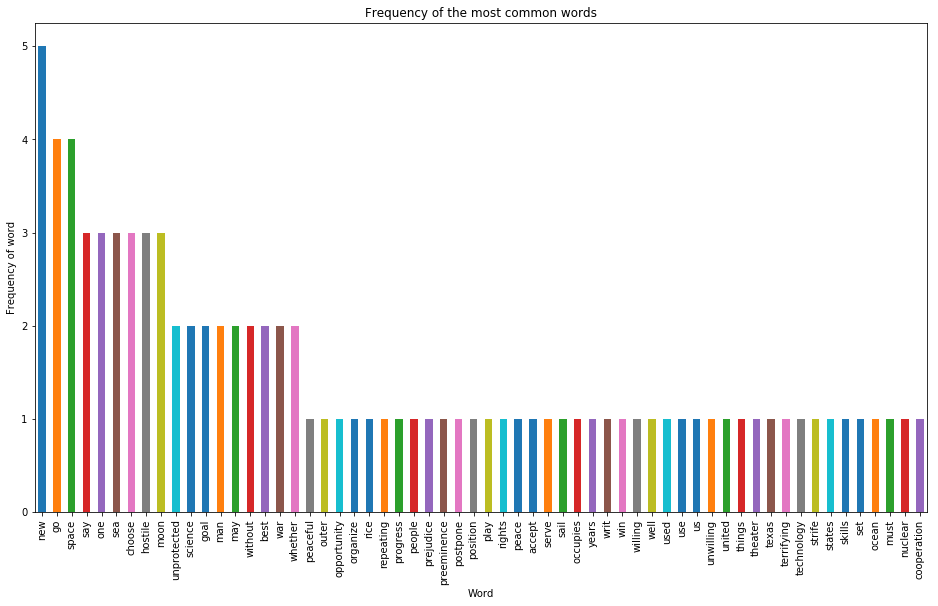

In [6]:
# Get the frequency distribution of the remaining words
words = nltk.tokenize.word_tokenize(txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 words
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

The most frequent word is "new", and other common words include "go", "space", "science", and "moon".

## Using Term Frequency - Inverse Document Frequency
In the previous example, we've used basic term frequency to determine each word's "importance" based on how often it appears in the document. When dealing with a large corpus of multiple documents, a more commonly used technique is *term frequency, inverse document frequency* (or TF-IDF) in which a score is calculated based on how often a word or term appears in one document compared to its more general frequency across the entire collection of documents. Using this technique, a high degree of relevance is assumed for words that appear frequently in a particular document, but relatively infrequently across a wide range of other documents.

### Load and View Two More Documents
Let's add a couple more documents to our collection.

In [7]:
# remind ourselves of the first document
print(doc1Txt)
print("------------------------------------------------")

# Get a second document, normalize it, and remove stop words
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Gettysburg.txt -o Gettysburg.txt
doc2 = open("Gettysburg.txt", "r")
doc2Txt = doc2.read()
print (doc2Txt)
from string import punctuation
txt2 = ''.join(c for c in doc2Txt if not c.isdigit())
txt2 = ''.join(c for c in txt2 if c not in punctuation).lower()
txt2 = ' '.join([word for word in txt2.split() if word not in (stopwords.words('english'))])


# and a third
print("------------------------------------------------")
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Cognitive.txt -o Cognitive.txt
doc3 = open("Cognitive.txt", "r")
doc3Txt = doc3.read()
print (doc3Txt)
from string import punctuation
txt3 = ''.join(c for c in doc3Txt if not c.isdigit())
txt3 = ''.join(c for c in txt3 if c not in punctuation).lower()
txt3 = ' '.join([word for word in txt3.split() if word not in (stopwords.words('english'))])


We set sail on this new sea because there is new knowledge to be gained, and new rights to be won, and they must be won and used for the progress of all people. For space science, like nuclear science and all technology, has no conscience of its own. Whether it will become a force for good or ill depends on man, and only if the United States occupies a position of pre-eminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war. I do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea, but I do say that space can be explored and mastered without feeding the fires of war, without repeating the mistakes that man has made in extending his writ around this globe of ours.
There is no strife, no prejudice, no national conflict in outer space as yet. Its hazards are hostile to us all. Its conquest deserves the best of all mankind, and its opportu

### Get TF-IDF Values for the top three words in each document
Now we'll install the **textblob** library and create some functions that we'll use to find the top 3 most important words in each document.

In [10]:
import sys

In [11]:
# install textblob library and define functions for TF-IDF
!{sys.executable} -m pip install -U textblob
import math
from textblob import TextBlob as tb

def tf(word, doc):
    lenOfDoc = len(doc.words)
    if lenOfDoc < 1: return 0
    else: return doc.words.count(word) / lenOfDoc

def contains(word, docs):
    return sum(1 for doc in docs if word in doc.words)

def idf(word, docs):
    docsCount = contains(word, docs)
    if docsCount < 1 : return 0
    else: return math.log(len(docs) / docsCount)

def tfidf(word, doc, docs):
    return tf(word,doc) * idf(word, docs)


# Create a collection of documents as textblobs
doc1 = tb(txt)
doc2 = tb(txt2)
doc3 = tb(txt3)
docs = [doc1, doc2, doc3]

# Use TF-IDF to get the three most important words from each document
print('-----------------------------------------------------------')
for i, doc in enumerate(docs):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, doc, docs) for word in doc.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))


    100% |████████████████████████████████| 634kB 10.4MB/s ta 0:00:01
Requirement not upgraded as not directly required: nltk>=3.1 in /anaconda/envs/py35/lib/python3.5/site-packages (from textblob) (3.3)
Requirement not upgraded as not directly required: six in /anaconda/envs/py35/lib/python3.5/site-packages (from nltk>=3.1->textblob) (1.11.0)
mxnet-model-server 0.4 requires mxnet-mkl>=1.2, which is not installed.
blobxfer 1.3.1 has requirement requests==2.19.1, but you'll have requests 2.18.4 which is incompatible.
blobxfer 1.3.1 has requirement ruamel.yaml==0.15.41, but you'll have ruamel-yaml 0.15.35 which is incompatible.
mxnet-model-server 0.4 has requirement onnx==1.1.1, but you'll have onnx 1.2.2 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
-----------------------------------------------------------
Top words in document 1
	Word: go, TF-IDF: 0.03231
	Word: sp

## Stemming
Until now, we've simply counted the number of occurrances of each word. This doesn't take into account the fact that sometimes multiple words may be based on the same common base, or *stem*; and may be semantically equivalent. For example, "fishes", "fished", "fishing", and "fisher" are all derived from the stem "fish".

### View frequency of words from Kennedy's inauguration speech
Let's look at another document and count the unstemmed words it contains.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15234  100 15234    0     0  43619      0 --:--:-- --:--:-- --:--:-- 43650
Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens:
We observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn before you and Almighty God the same solemn oath our forebears prescribed nearly a century and three-quarters ago.
The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of th

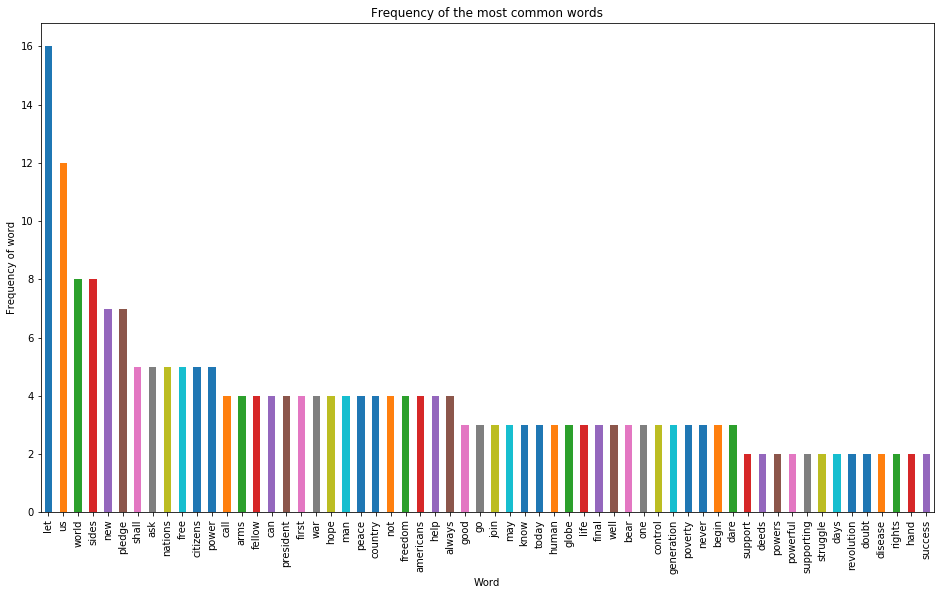

In [12]:
# Load and print text
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Inaugural.txt -o Inaugural.txt
doc4 = open("Inaugural.txt", "r", encoding="utf-16")
doc4Txt = doc4.read()

print(doc4Txt)

# Normalize and remove stop words
from string import punctuation
doc4Txt = ''.join(c for c in doc4Txt if not c.isdigit())
doc4Txt = ''.join(c for c in doc4Txt if c not in punctuation).lower()
doc4Txt = ' '.join([word for word in doc4Txt.split() if word not in (stopwords.words('english'))])

# Get Frequency distribution
words = nltk.tokenize.word_tokenize(doc4Txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Stem the words using the Porter stemmer
Now let's stem the words and count the stems.

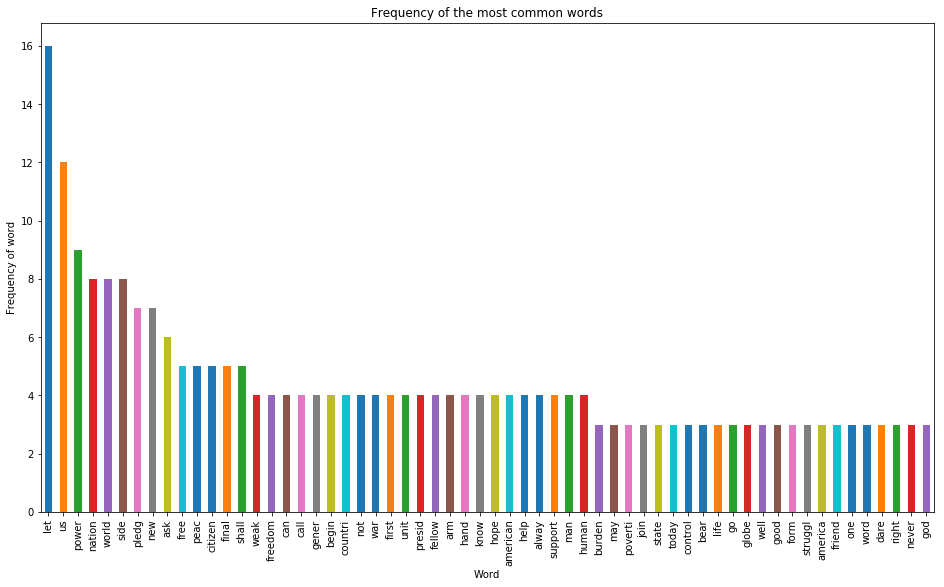

In [13]:
from nltk.stem.porter import PorterStemmer

# Get the word stems
ps = PorterStemmer()
stems = [ps.stem(word) for word in words]

# Get Frequency distribution
fdist = FreqDist(stems)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

Compare the frequencies of the stems to the unstemmed words. Note in particular that the unstemmed woprds include "power", "powers", and "powerful", which are all stemmed to "power". Additionally, the text includes "nations" and "nation" - which also have a common stem.

## Using the Text Analyics Cognitive Service
The previous examples demonstrate some ways to write code and analyze text, and they serve to illustrate that text analytics involves applying statistical techniques to text data in order to discern semantic meaning. This is a common theme in many AI solutions.

Microsoft Cognitive Services includes a Text Analytics service that encapsulates much more sophisticated techniques for ascertaining meaning from text.

### Create a Text Analytics Service
To see this in action, you need to provision a Text Analytics service in your Azure subscription. Follow these steps to do that:

1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ New**, and in the **AI + Cognitive Services** category, click **See all**.
4. In the list of cognitive services, click **Text Analytics API**.
5. In the **Text Analytics API** blade, click **Create**.
6. In the **Create** blade, enter the following details, and then click **Create**
  * **Name**: A unique name for your service.
  * **Subscription**: Your Azure subscription.
  * **Location**: Choose the Azure datacenter location where you want to host your service.
  * **Pricing tier**: Choose the F0 pricing tier.
  * **Resource Group**: Choose the existing resource group you created in the previous lab (or create a new one if you didn't complete the previous lab)
  * Read the notice about the use of your data, and select the checkbox.
7. Wait for the service to be created.
8. When deployment is complete, click **All Resources** and then click your Text Analytics service to open its blade.
9. In the blade for your Text Analytics service, note the **Endpoint** URL. Then assign the base URI (*location*.api.cognitive.microsoft.com) for your service to the **textAnalyticsURI** variable in the cell below.
10. In the blade for your Text Analytics service, click **Keys** and then copy **Key 1** to the clipboard and paste it into the **textKey** variable assignment value in the cell below. 
11. Run the cell below to assign the variables.

In [14]:
textAnalyticsURI = 'southcentralus.api.cognitive.microsoft.com'
textKey = '945b2f2fde05405dbf1292e0f3741d9e'

### Call the Text Analytics Service to Determine Key Phrases in the Documents
One of the methods provided by the Text Analytics service is the ability to extract a list of key phrases from text documents, which give an insight into the core topics discussed in the document.

Run the following cell to call the **keyPhrases** method of the Text Analytics service and extract the key phrases for the text documents you have loaded so far in this notebook.

In [15]:
import http.client, urllib.request, urllib.parse, urllib.error, base64, json, urllib

# Define the request headers.
headers = {
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': textKey,
    'Accept': 'application/json'
}

# Define the parameters
params = urllib.parse.urlencode({
})

# Define the request body
body = {
  "documents": [
    {
          "language": "en",
          "id": "1",
          "text": doc1Txt
    },
    {
          "language": "en",
          "id": "2",
          "text": doc2Txt
    },
    {
          "language": "en",
          "id": "3",
          "text": doc3Txt
    },
    {
          "language": "en",
          "id": "4",
          "text": doc4Txt
    }
  ]
}

try:
    # Execute the REST API call and get the response.
    conn = http.client.HTTPSConnection(textAnalyticsURI)
    conn.request("POST", "/text/analytics/v2.0/keyPhrases?%s" % params, str(body), headers)
    response = conn.getresponse()
    data = response.read().decode("UTF-8")

    # 'data' contains the JSON data. The following formats the JSON data for display.
    parsed = json.loads(data)
    for document in parsed['documents']:
        print("Document " + document["id"] + " key phrases:")
        for phrase in document['keyPhrases']:
            print("  " + phrase)
        print("---------------------------")
    conn.close()

except Exception as e:
    print('Error:')
    print(e)

Document 1 key phrases:
  new sea
  new knowledge
  new ocean
  new rights
  space science
  Moon
  hostile misuse of space
  outer space
  new terrifying theater of war
  sea of peace
  best
  goal
  hostile use of land
  nuclear science
  fires of war
  national conflict
  prejudice
  mankind
  United States
  challenge
  opportunity
  position of pre-eminence
  energies
  skills
  technology
  peaceful cooperation
  things
  strife
  writ
  conquest
  decade
  mistakes
  sail
  highest mountain
  years
  play Texas
  progress
  people
  force
  globe
  conscience
  hazards
---------------------------
Document 2 key phrases:
  new nation
  people
  honored dead
  great civil war
  great battlefield
  great task
  living
  increased devotion
  measure of devotion
  brave men
  new birth of freedom
  government
  fathers
  final resting place
  proposition
  continent
  Liberty
  God
  world
  little note
  score
  years
  cause
  larger sense
  poor power
  unfinished work
  portion
 

From these key phrases, it's reasonably clear that the first document is about freedom and nationhood, while the third is about software services for AI.

### Perform Sentiment Analysis
Another common AI requirement is to determine the sentiment associated with some text. For example, you might analyze tweets that include your organization's twitter handle to determine if they are positive or negative.

Run the cell below to use the **sentiment** method of the Text Analytics service to discern the sentiment of two sentences.

In [16]:
body = {
  "documents": [
    {
      "language": "en",
      "id": "1",
      "text": "Wow! cognitive services are fantastic."
    },
    {
      "language": "en",
      "id": "2",
      "text": "I hate it when computers don't understand me."
    }
  ]
}

try:
    conn = http.client.HTTPSConnection(textAnalyticsURI)
    conn.request("POST", "/text/analytics/v2.0/sentiment?%s" % params, str(body), headers)
    response = conn.getresponse()
    data = response.read().decode("UTF-8")
    parsed = json.loads(data)
    for document in parsed['documents']:
        sentiment = "negative"
        if document["score"] >= 0.5:
            sentiment = "positive"
        print("Document:" + document["id"] + " = " + sentiment)
    conn.close()
    
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))



Document:1 = positive
Document:2 = negative


## Working with Speech
So far, we've seen how analyze text; but increasingly AI systems enable humans to communicate with software services through speech recognition.

### Create a Bing Speech Service
The Microsoft Cognitive Services include the Bing Speech service, that can interpret spoken input from a microphone or audio file. Follow these steps to provision the Bing speech service:

1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ New**, and in the **AI + Cognitive Services** category, click **See all**.
4. In the list of cognitive services, click **Bing Speech API**.
5. In the **Bing Speech API** blade, click **Create**.
6. In the **Create** blade, enter the following details, and then click **Create**
  * **Name**: A unique name for your service.
  * **Subscription**: Your Azure subscription.
  * **Pricing tier**: Choose the F0 pricing tier.
  * **Resource Group**: Choose the existing resource group you used previously.
  * Read the notice about the use of your data, and select the checkbox.
7. Wait for the service to be created.
8. When deployment is complete, click **All Resources** and then click your Bing Speech service to open its blade.
10. In the blade for your Bing Speech service, click **Keys** and then copy **Key 1** to the clipboard and paste it into the **textKey** variable assignment value in the cell below. 

In [17]:
speechKey = '14e197e05c964cceac488f4fa8cd40f8'

### Install the SpeechRecognition Package
You can call the Bing Speech API by sending HTTP requests containing a JSON payload as you did for the Text Analytics API. However, the Bing Speech API is supported in a pre-built Python package named **SpeechRecognition**, which makes it easier to use. You can find out more about this package at https://pypi.python.org/pypi/SpeechRecognition.

Run the following cell to install the **SpeechRecognition** package.

In [19]:
!{sys.executable} -m pip install -U SpeechRecognition

    100% |████████████████████████████████| 32.8MB 2.2MB/s eta 0:00:01
mxnet-model-server 0.4 requires mxnet-mkl>=1.2, which is not installed.
mxnet-model-server 0.4 has requirement onnx==1.1.1, but you'll have onnx 1.2.2 which is incompatible.
blobxfer 1.3.1 has requirement requests==2.19.1, but you'll have requests 2.18.4 which is incompatible.
blobxfer 1.3.1 has requirement ruamel.yaml==0.15.41, but you'll have ruamel-yaml 0.15.35 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Listen to the Speech
In this exercise, you will use a .wav audio file. To hear the speech you will analyze, run the cell below (this assumes you have audio capabilities in your computer!)

In [20]:
import IPython

!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/RainSpain.wav -o RainSpain.wav

IPython.display.Audio('RainSpain.wav', autoplay=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  648k  100  648k    0     0  2002k      0 --:--:-- --:--:-- --:--:-- 2006k


### Call the Bing Speech Service to Transcribe the Audio
Hopefully you understood what was said in the audio file.

Let's see how the Bing Speech API does!

In [21]:
import speech_recognition as sr

# Read the audio file
r = sr.Recognizer()
with sr.AudioFile('RainSpain.wav') as source:
    audio = r.record(source)
    
# Alternative code to use mic input (only works in local Jupyter - not in Azure Notebooks)
# r = sr.Recognizer()
# with sr.Microphone() as source:
#     print("Say something!")
#     audio = r.listen(source)

# transcribe speech using the Bing Speech API
try:
    transcription = r.recognize_bing(audio, key=speechKey)
    print("Here's what I heard:")
    print('"' + transcription + '"')
    
except sr.UnknownValueError:
    print("The audio was unclear")
except sr.RequestError as e:
    print (e)
    print("Something went wrong :-(; {0}".format(e))


Here's what I heard:
"The rain in Spain stays mainly in the plain."


## Using the Language Understanding Intelligence Service (LUIS)
Increasingly, we expect computers to be able to use AI in order to understand spoken or typed commands in natural language. For example, we want to be able to say "switch on the light" or "put the light on", and have an AI-powered device understand the command and take appropriate action.

### Provision the Language Understanding Intelligence Service (LUIS)
The Microsoft cognitive services include the Language Understanding Intelligence Service (LUIS), which enables you to define *intents* that are applied to *entities* based on *utterances*.

To get started with LUIS, follow these steps to provision the service in your Azure subscription:
1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ New**, and in the **AI + Cognitive Services** category, click **See all**.
4. In the list of cognitive services, click **Language Understanding**.
5. In the **Language Understanding** blade, click **Create**.
6. In the **Create** blade, enter the following details, and then click **Create**
  * **Name**: A unique name for your service.
  * **Subscription**: Your Azure subscription.
  * **Location**: Choose a location in the US.
  * **Pricing tier**: Choose the F0 pricing tier.
  * **Resource Group**: Choose the existing resource group you used previously.
  * Read the notice about the use of your data, and select the checkbox.
7. Wait for the service to be created.

### Create a LUIS App
To implement natural language understanding with LUIS, you must first create an app; and then add intents, utterances, and entities to define the commands you want the app to understand.
1. Open a new browser tab and navigate to https://www.luis.ai/.
2. Sign in using the Microsoft account associated with your Azure subscription. If this is the first time you have signed into LUIS, you may need to grant the app some permissions to access your account details, and then fill in some information and accept the terms of use.
3. If a message prompting you to complete a tutorial in which you will create a *Scheduler* app is displayed, close it (you can complete this tutorial later - for now, we'll focus on a simpler example).
4. Click **New App** and create a new app with the following settings:
  * **Name**: Simple Home Automation
  * **Culture**: English
  * **Description**: A basic home automation example
5. In the pane on the left, click **Intents**. Then click **Add Intent**, and add an intent with the name **Light On**.
6. In the **Utterances** page for the **Light On** intent, type "*switch the light on*" and press **Enter** to add this utterance to the list.
7. In the list of utterances, in the *switch the light on* utterance, hold the mouse over the word "light" so that the list shows the value *switch the [light] on*. Then in the **Search or create** box type *Light* and create a simple entity named **Light**.
8. In the pane on the left, click **Intents** and click **Add Intent**, to add a second intent with the name **Light Off**.
9. In the **Utterances** page for the **Light Off** intent, type "*switch the light off*" and press **Enter** to add this utterance to the list.
10. In the list of utterances, in the *switch the light on* utterance, hold the mouse over the word "light" so that the list shows the value *switch the [light] on*. Then click **[light]** select the *Light* entity you created previously.
11. At the top of the page, click **Train** to train the application
12. After the app has been trained, click **Test**, and then in the test pane, enter the following utterances and verify that they are correctly interpreted as commands for the *Light On* and *Light Off* intents respectively:
    * *turn on the light*
    * *put the light off*
13. IAt the top of the page, click **Publish**. Then click **Publish to production slot**.
14. After the app has been published, note the **Endpoint** URL that is generated for your app - this includes the location where you provisioned the service, your app ID, and the key assigned to the app.

### Consume the LUIS App
Now that you have published your LUIS app, you can consume it from a client application by making HTTP requests that include a query string. The query will be used to identify the most likely intent, which will be returned to the calling client as in JSON response.

Modify the **endpointUrl** variable declaration in the cell below to reflect the endpoint URL for your app. Then run the cell, and enter a command when prompted to call your service and interpret the command. The JSON response is shown with an appropriate image for each command.

Try the following commands:
* *Switch on the light*
* *Turn on the light*
* *Turn off the light*
* *Could you put the light on please?*

Please enter a command: 
turn light on
{'entities': [], 'topScoringIntent': {'score': 0.522818446, 'intent': 'Light On'}, 'query': 'turn light on'}


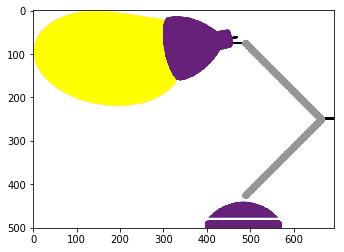

In [22]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO
import json 

# Set up API configuration
endpointUrl = "https://westus.api.cognitive.microsoft.com/luis/v2.0/apps/dc0b0da1-6c79-4fc6-b359-4b56025ff47e?subscription-key=3a5e540c4df84ac2ad51a66cbd057389&timezoneOffset=-360&q="

# prompt for a command
command = input('Please enter a command: \n')

# Call the LUIS service and get the JSON response
endpoint = endpointUrl + command.replace(" ","+")
response = requests.get(endpoint)
data = json.loads(response.content.decode("UTF-8"))
print (data)

# Identify the top scoring intent
intent = data["topScoringIntent"]["intent"]
if (intent == "Light On"):
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOn.jpg'
elif (intent == "Light Off"):
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOff.jpg'
else:
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Dunno.jpg'

# Get the appropriate image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)


## Combining Speech Recognition and Natural Language Understanding
An obvious next step is to combine speech recognition with natural language understanding so that a spoken command can be interpreted and the appropriate action taken.

### Download Command Audio
Let's start by downloading and playing some spoken commands for our home automation system. Run the two cells under this to hear the commands.

In [23]:
import IPython

# Get the "lights on" command
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOn.wav -o LightOn.wav
    
IPython.display.Audio('LightOn.wav', autoplay=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  535k  100  535k    0     0  1864k      0 --:--:-- --:--:-- --:--:-- 1865k


In [24]:
# Get the "lights on" command
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOff.wav -o LightOff.wav
    
IPython.display.Audio('LightOff.wav', autoplay=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  526k  100  526k    0     0  1186k      0 --:--:-- --:--:-- --:--:-- 1183k


### Transcribe and Interpret the "Light On" Command
Now you can use the Bing Speech API to transcribe the command, and then use your LUIS app to interpret the command and take the appropriate action.

You should have already installed the **SpeechRecognition** package, set the **speechKey** for your Bing Speech service, and set the **apiUrl**, **appId**, and **appKey** for your LUIS app (if you have closed and re-opened the notebook, re-run the appropriate cells above to set these).

Run the cell below that to test the "Light On" command.

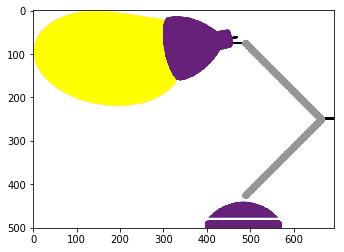

In [25]:
%matplotlib inline
import speech_recognition as sr
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO
import json 

# Specify which audio file to use
audioFile = "LightOn.wav"

# Read the audio file
r = sr.Recognizer()
with sr.AudioFile(audioFile) as source:
    audio = r.record(source)

try:
    # transcribe speech using the Bing Speech API
    transcription = r.recognize_bing(audio, key=speechKey)
    
    # Call the LUIS service and get the JSON response
    endpoint = endpointUrl + transcription.replace(" ","+")
    response = requests.get(endpoint)
    data = json.loads(response.content.decode("UTF-8"))

    # Identify the top scoring intent
    intent = data["topScoringIntent"]["intent"]
    if (intent == "Light On"):
        img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOn.jpg'
    elif (intent == "Light Off"):
        img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOff.jpg'
    else:
        img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Dunno.jpg'

    # Get the appropriate image and show it
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    imshow(img)
    
except sr.UnknownValueError:
    print("Bing Speech could not understand audio")
except sr.RequestError as e:
    print (e)
    print("Could not request results from the Bing Speech service; {0}".format(e))


### Transcribe and Interpret the "Light Off" Command
Modify the cell above to set the **audioFile** variable to the **LightOff.wav** audio file, and then run the cell again to test it